# Implementación demodulador BFSK no coherente

In [81]:
import matplotlib.pyplot as plt
import numpy as np

Generamos un array con los coeficientes de un periodo de cada una de las dos señales senoidales a frecuencias distintas y con una frecuencia de muestreo determinada. Usamos senoidales de amplitud unidad.

In [91]:
fs = 44100 # Frecuencia de muestreo estándar
frec0 = 2500 # Frecuencia de la senoidal para el cero
frec1 = 5000 # Frecuencia de la senoidal para el uno

frec2 = 10000 # Se definen dos frecuencias más para que se tengan 2 símbolos
frec3 = 15000

# Obtenemos los instantes en los que se debe evaluar el seno a cada frecuencia
t0 = np.arange(0, 1/frec0, 1/fs)
t1 = np.arange(0, 1/frec1, 1/fs)
t2 = np.arange(0, 1/frec2, 1/fs)
t3 = np.arange(0, 1/frec3, 1/fs)


signal0 = np.sin(2*np.pi*frec0*t0)
signal1 = np.sin(2*np.pi*frec1*t1)
signal2 = np.sin(2*np.pi*frec2*t2)
signal3 = np.sin(2*np.pi*frec3*t3)

Se representan las muestras almacenadas de las señales.

C:\Users\GIE-23\AppData\Local\Temp\ipykernel_18596\1122050165.py:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t0,signal0,use_line_collection=True)


<StemContainer object of 3 artists>

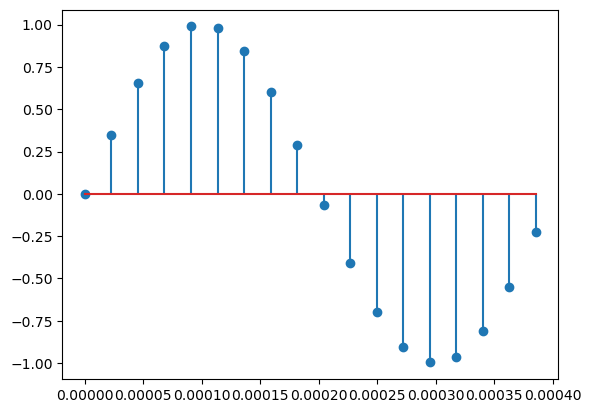

In [92]:
plt.stem(t0,signal0,use_line_collection=True)

C:\Users\GIE-23\AppData\Local\Temp\ipykernel_18596\662732419.py:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t1,signal1,use_line_collection=True)


<StemContainer object of 3 artists>

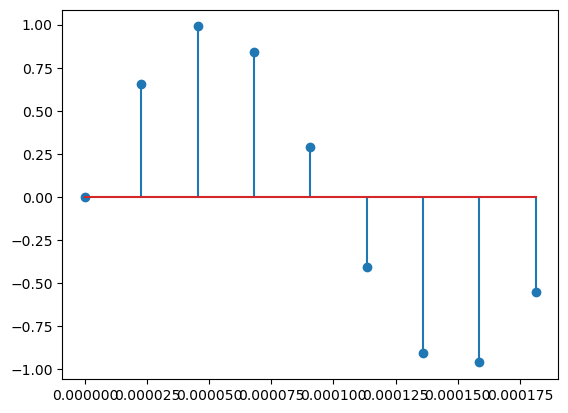

In [93]:
plt.stem(t1,signal1,use_line_collection=True)

C:\Users\GIE-23\AppData\Local\Temp\ipykernel_18596\2292027662.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t2,signal2,use_line_collection=True)


<StemContainer object of 3 artists>

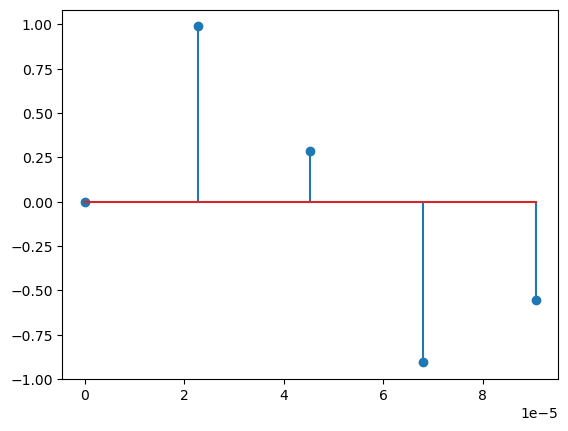

In [94]:
# Haz lo mismo con las nuevas señales
plt.stem(t2,signal2,use_line_collection=True)

C:\Users\GIE-23\AppData\Local\Temp\ipykernel_18596\3605834264.py:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t3,signal3,use_line_collection=True)


<StemContainer object of 3 artists>

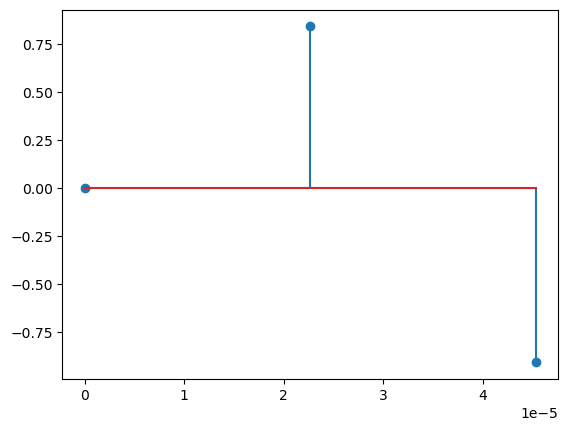

In [95]:
plt.stem(t3,signal3,use_line_collection=True)

Utilizamos una señal de prueba a la entrada del demodulador, compuesta por la concatenación de varios periodos de cada una de las señales.

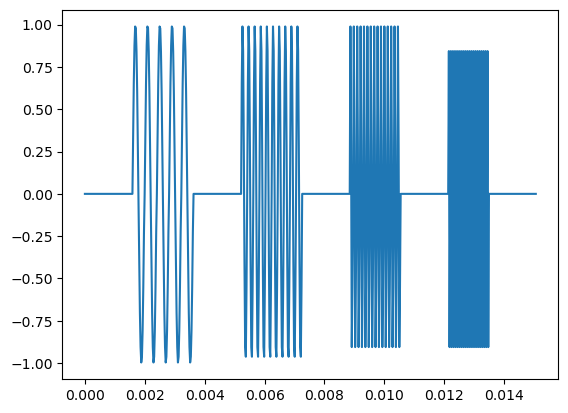

In [96]:
# inputSignal = np.concatenate((np.zeros(70),np.tile(signal0,5),np.zeros(70),np.tile(signal1,10),np.zeros(70)))
# inputTime = np.arange(0, np.size(inputSignal)/fs, 1/fs)
# plt.plot(inputTime,inputSignal)

inputSignal = np.concatenate((np.zeros(70), np.tile(signal0,5), np.zeros(70), np.tile(signal1,10), np.zeros(70), np.tile(signal2,15), np.zeros(70), np.tile(signal3,20), np.zeros(70)))
inputTime = np.arange(0, np.size(inputSignal)/fs, 1/fs)
plt.plot(inputTime,inputSignal)

Diseñamos un filtro FIR con frecuencia central frec0 y otro con frecuencia central frec1. El ancho de banda de los filtros es de 1 kHz, y la caída configurada en el software de diseño de filtros es también de 3 kHz. Usamos a priori una ventana rectangular porque es la que necesita menos coeficientes y el filtro será más rápido. Es muy importante que los filtros tengan el mismo número de coeficientes para que la velocidad sea la misma.

In [97]:
# Coeficientes del filtro con frecuencia central 5 kHz y ancho de banda 2 kHz
h0 = [
    -0.000201355772714110,
    0.000653816188320467,
    0.002464929123956739,
    0.004698323099716243,
    0.006472522106834270,
    0.006768098766356803,
    0.004707149858383478,
    -0.000179133773194529,
    -0.007777633556929373,
    -0.017372676473929063,
    -0.023322523505367627,
    -0.056721723900381854,
    -0.085730316065059958,
    -0.100021251106212197,
    -0.091900905706122887,
    -0.059025371843259372,
    -0.005698490076443477,
    0.057758380433406448,
    0.117480193303071578,
    0.159700368497962375,
    0.174495200803213873,
    0.159700368497961154,
    0.117480193303071731,
    0.057758380433406989,
    -0.005698490076443564,
    -0.059025371843259428,
    -0.091900905706122915,
    -0.100021251106212530,
    -0.085730316065060042,
    -0.056721723900381806,
    -0.023322523505367572,
    -0.017372676473929028,
    -0.007777633556929405,
    -0.000179133773194559,
    0.004707149858383474,
    0.006768098766356775,
    0.006472522106834230,
    0.004698323099716226,
    0.002464929123956715,
    0.000653816188320446,
    -0.000201355772714129,
]
# Coeficientes del filtro con frecuencia central 10 kHz y ancho de banda 2 kHz
h1 = [
    -0.000437947209034125,
    0.000056572416815567,
    0.001197959749610647,
    0.001856058171633995,
    0.000939726514471762,
    -0.001488427775156999,
    -0.003801159512749101,
    -0.003627580431862583,
    0.000468093914991875,
    0.007553776093841075,
    -0.001810834441078968,
    0.030809060131481155,
    0.047700909298391908,
    0.022655191849141401,
    -0.042241296131349720,
    -0.110462321758408644,
    -0.131980327456754726,
    -0.078771305620529947,
    0.030861938994151142,
    0.138924685542881288,
    0.183194455319028809,
    0.138924685542879733,
    0.030861938994151222,
    -0.078771305620530030,
    -0.131980327456754892,
    -0.110462321758408422,
    -0.042241296131349741,
    0.022655191849141585,
    0.047700909298391950,
    0.030809060131481089,
    -0.001810834441079077,
    0.007553776093840969,
    0.000468093914991866,
    -0.003627580431862567,
    -0.003801159512749081,
    -0.001488427775157012,
    0.000939726514471734,
    0.001856058171633986,
    0.001197959749610642,
    0.000056572416815554,
    -0.000437947209034138,
]
# Coeficientes del filtro con frecuencia central 2.5 kHz y ancho de banda 15 kHz
h2 = [
    -0.000981904044819091,
    -0.000528258105119493,
    0.001833225519727676,
    0.001566011831659465,
    -0.002008434760237730,
    -0.002472115383842902,
    0.001143867785342549,
    0.001474579084812379,
    0.000623180436146587,
    0.012147133723959549,
    -0.000335642996178197,
    0.039636119611723981,
    0.024248256648674051,
    -0.076476324135673762,
    -0.071746966214065871,
    0.089266863763901222,
    0.128982863177833446,
    -0.068919555500863691,
    -0.175344528810898515,
    0.013263891852454565,
    0.169255473030929526,
    0.013263891852454270,
    -0.175344528810897127,
    -0.068919555500863747,
    0.128982863177833362,
    0.089266863763900986,
    -0.071746966214065899,
    -0.076476324135674137,
    0.024248256648674037,
    0.039636119611724120,
    -0.000335642996178208,
    0.012147133723959497,
    0.000623180436146566,
    0.001474579084812355,
    0.001143867785342573,
    -0.002472115383842904,
    -0.002008434760237782,
    0.001566011831659468,
    0.001833225519727709,
    -0.000528258105119485,
    -0.000981904044819128,
]

# Coeficientes del filtro con frecuencia central 12.5 kHz y ancho de banda 20 kHz
h3 = [
    -0.000274873501453708,
    -0.000704421342569797,
    0.001257557963106922,
    0.000399178201614594,
    -0.002999147782689142,
    0.002910650214757884,
    0.001080371066924006,
    -0.004725905254552572,
    0.002143139596810207,
    0.006395308882400736,
    0.000058824657914051,
    0.033705949797125143,
    -0.012888173278057590,
    -0.063834689896447777,
    0.108767852535428755,
    -0.040713223057479986,
    -0.099885602545719099,
    0.168825699149291797,
    -0.072965087480516513,
    -0.110798947312396825,
    0.168491078773020470,
    -0.110798947312395452,
    -0.072965087480515778,
    0.168825699149291963,
    -0.099885602545719279,
    -0.040713223057479840,
    0.108767852535428769,
    -0.063834689896448082,
    -0.012888173278057594,
    0.033705949797125212,
    0.000058824657913927,
    0.006395308882400787,
    0.002143139596810185,
    -0.004725905254552601,
    0.001080371066924050,
    0.002910650214757904,
    -0.002999147782689183,
    0.000399178201614609,
    0.001257557963106923,
    -0.000704421342569791,
    -0.000274873501453711,
]

Creamos una clase para un filtro FIR que tendrá los métodos apropiados para manejar una lista circular (buffer circular). Para la implementación en C será necesaria una función init que inicialize las variables del filtro.

In [98]:
class FIR_Filter:
    def __init__(self, coefs):
        self.h = coefs # Coeficientes del filtro
        
        # Atributos asociados al buffer circular
        self.buf = [0]*len(self.h)
        self.bufIndex = 0 
        
        # Salida actual del filtro
        self.out = 0
    
    def FIRFilterClear(self):
        self.buf = [0]*len(self.h)
        self.bufIndex = 0
        self.out = 0
    
    def FIRFilterUpdate(self, filterInput):
        
        # Metemos la última muestra en el buffer circular
        self.buf[self.bufIndex] = filterInput
        
        # Incrementamos el índice
        self.bufIndex += 1
        
        if self.bufIndex == len(self.buf):
            self.bufIndex = 0
        
        # Computamos el nuevo valor de la salida
        self.out = 0
        
        sumIndex = self.bufIndex
        
        for n in range(len(self.buf)):
            if sumIndex > 0:
                sumIndex -= 1
            else:
                sumIndex = len(self.buf)-1
                
            self.out += self.h[n]*self.buf[sumIndex]

Creamos un objeto por cada filtro e introducimos la señal de prueba, representando la salida de cada filtro y la señal original.

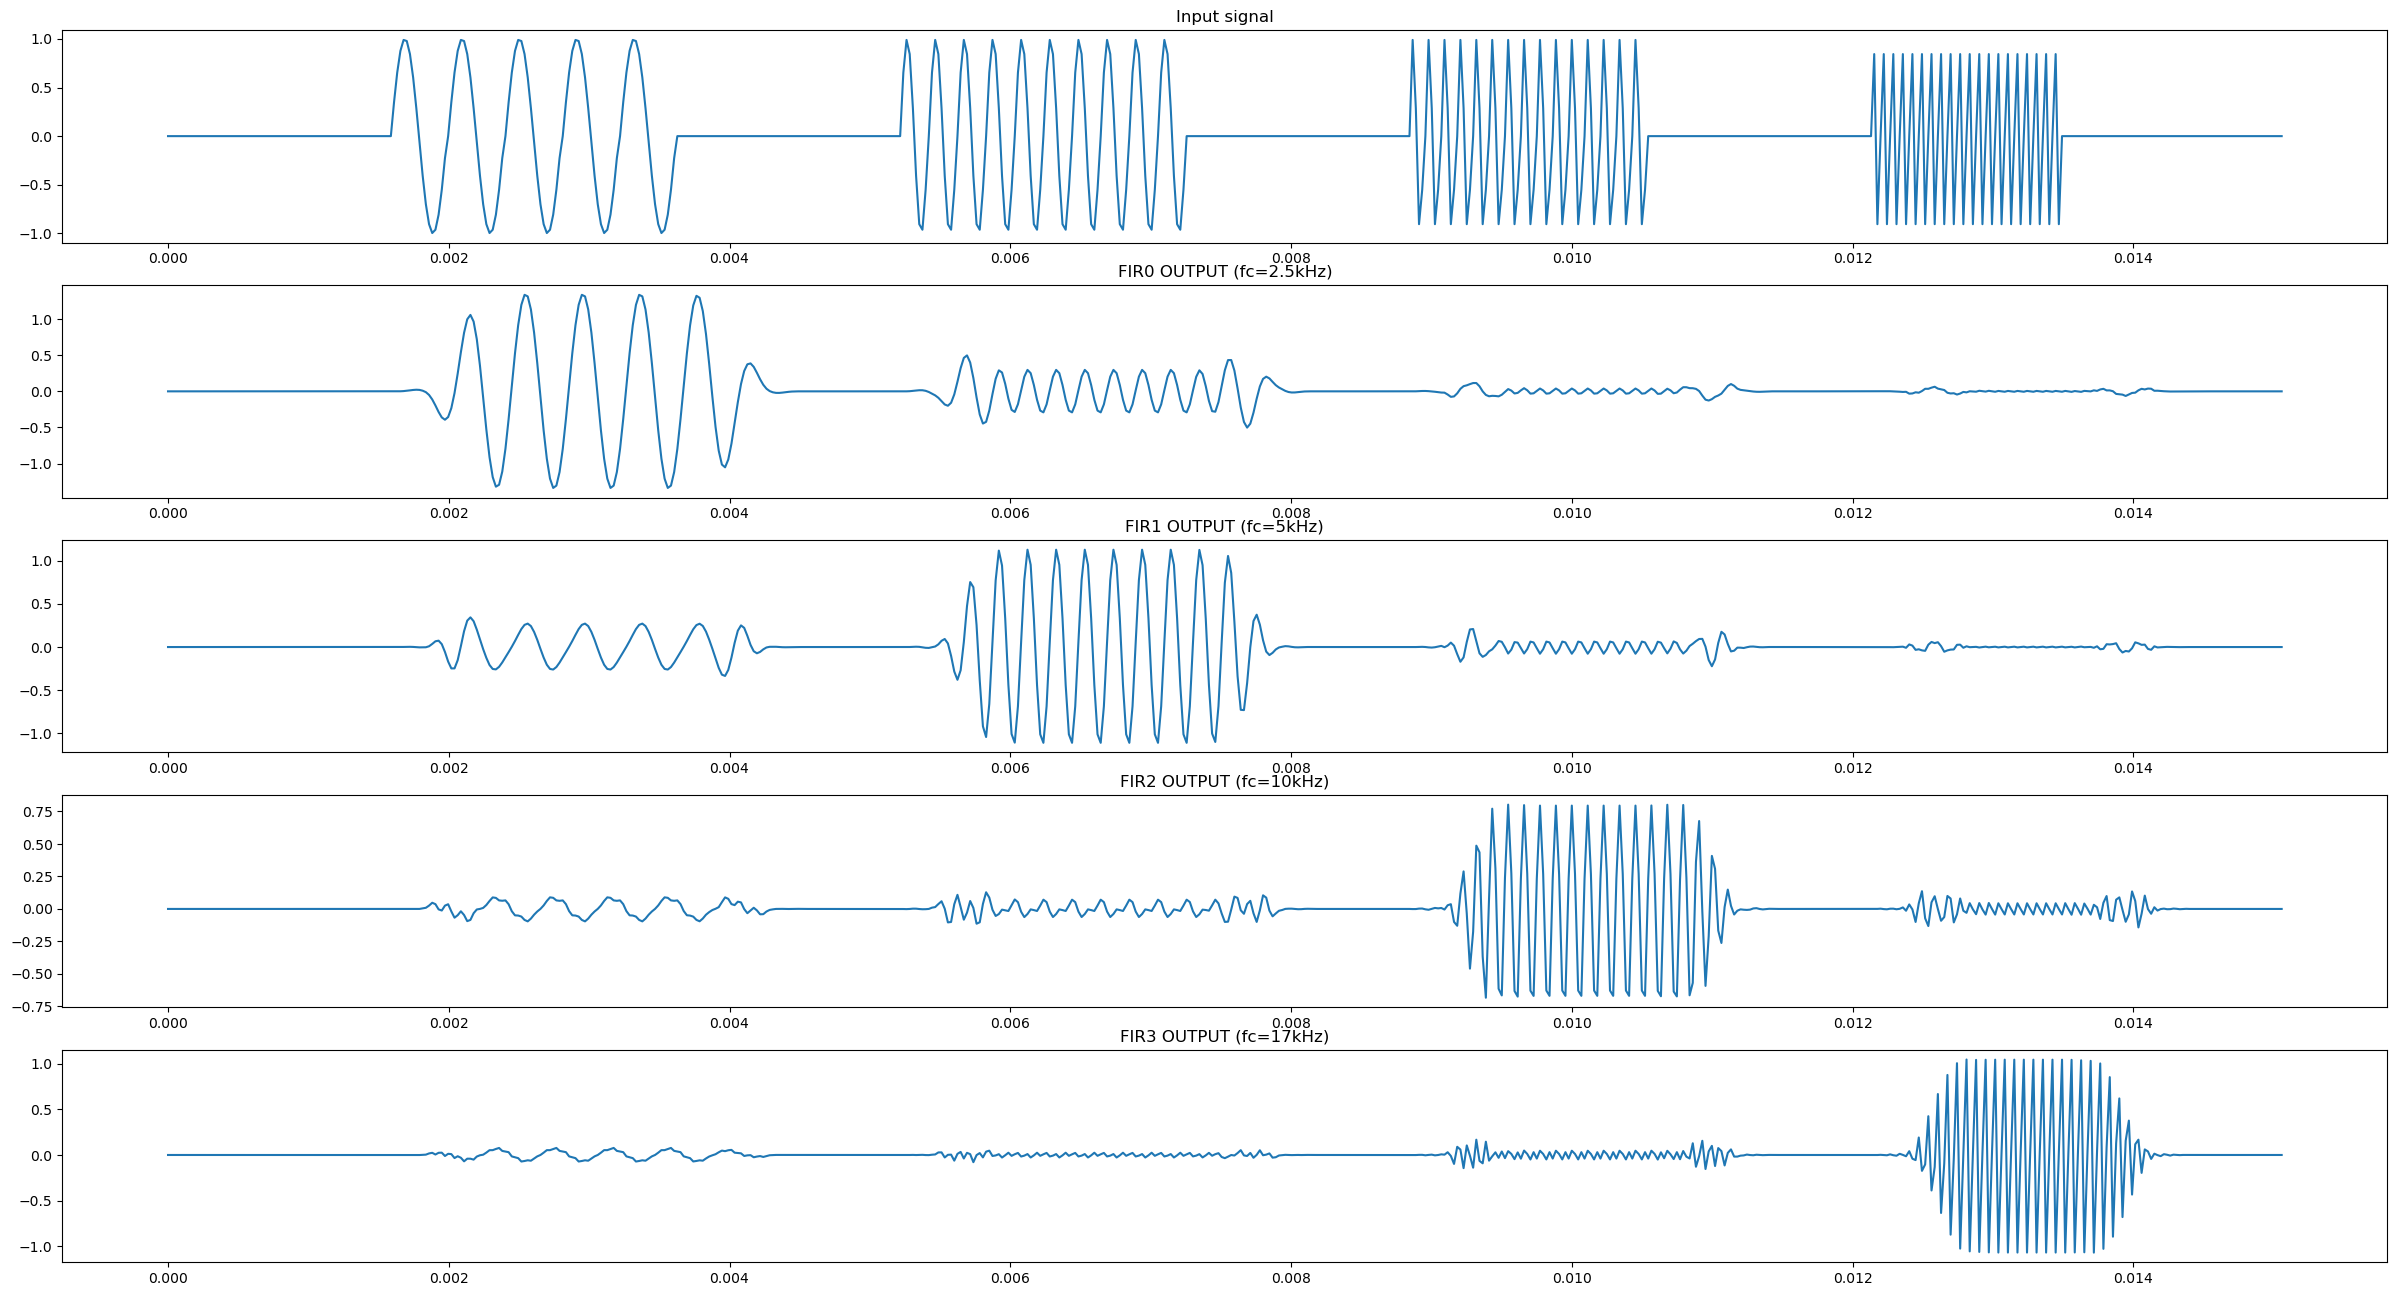

In [99]:
fir0 = FIR_Filter(h0)
fir1 = FIR_Filter(h1)
fir2 = FIR_Filter(h2)
fir3 = FIR_Filter(h3)

salida_fir0 = np.array([])
salida_fir1 = np.array([])
salida_fir2 = np.array([])
salida_fir3 = np.array([])

for sample in inputSignal:
    # Actualizamos el valor de los dos filtros
    fir0.FIRFilterUpdate(sample)
    fir1.FIRFilterUpdate(sample)
    fir2.FIRFilterUpdate(sample)
    fir3.FIRFilterUpdate(sample)
    
    salida_fir0 = np.append(salida_fir0,fir0.out)
    salida_fir1 = np.append(salida_fir1,fir1.out)
    salida_fir2 = np.append(salida_fir2,fir2.out)
    salida_fir3 = np.append(salida_fir3,fir3.out)

fig, axes = plt.subplots(5,1,figsize=(30,16))
axes[0].set_title("Input signal")
axes[0].plot(inputTime,inputSignal)
axes[1].set_title("FIR0 OUTPUT (fc=2.5kHz)")
axes[1].plot(inputTime,salida_fir0)
axes[2].set_title("FIR1 OUTPUT (fc=5kHz)")
axes[2].plot(inputTime,salida_fir1)
axes[3].set_title("FIR2 OUTPUT (fc=10kHz)")
axes[3].plot(inputTime,salida_fir2)
axes[4].set_title("FIR3 OUTPUT (fc=17kHz)")
axes[4].plot(inputTime,salida_fir3)
plt.show()


Ahora probamos con un paquete de capa física formado por un bit de stop, un bit de start, 8 bits de datos y un bit de paridad par.

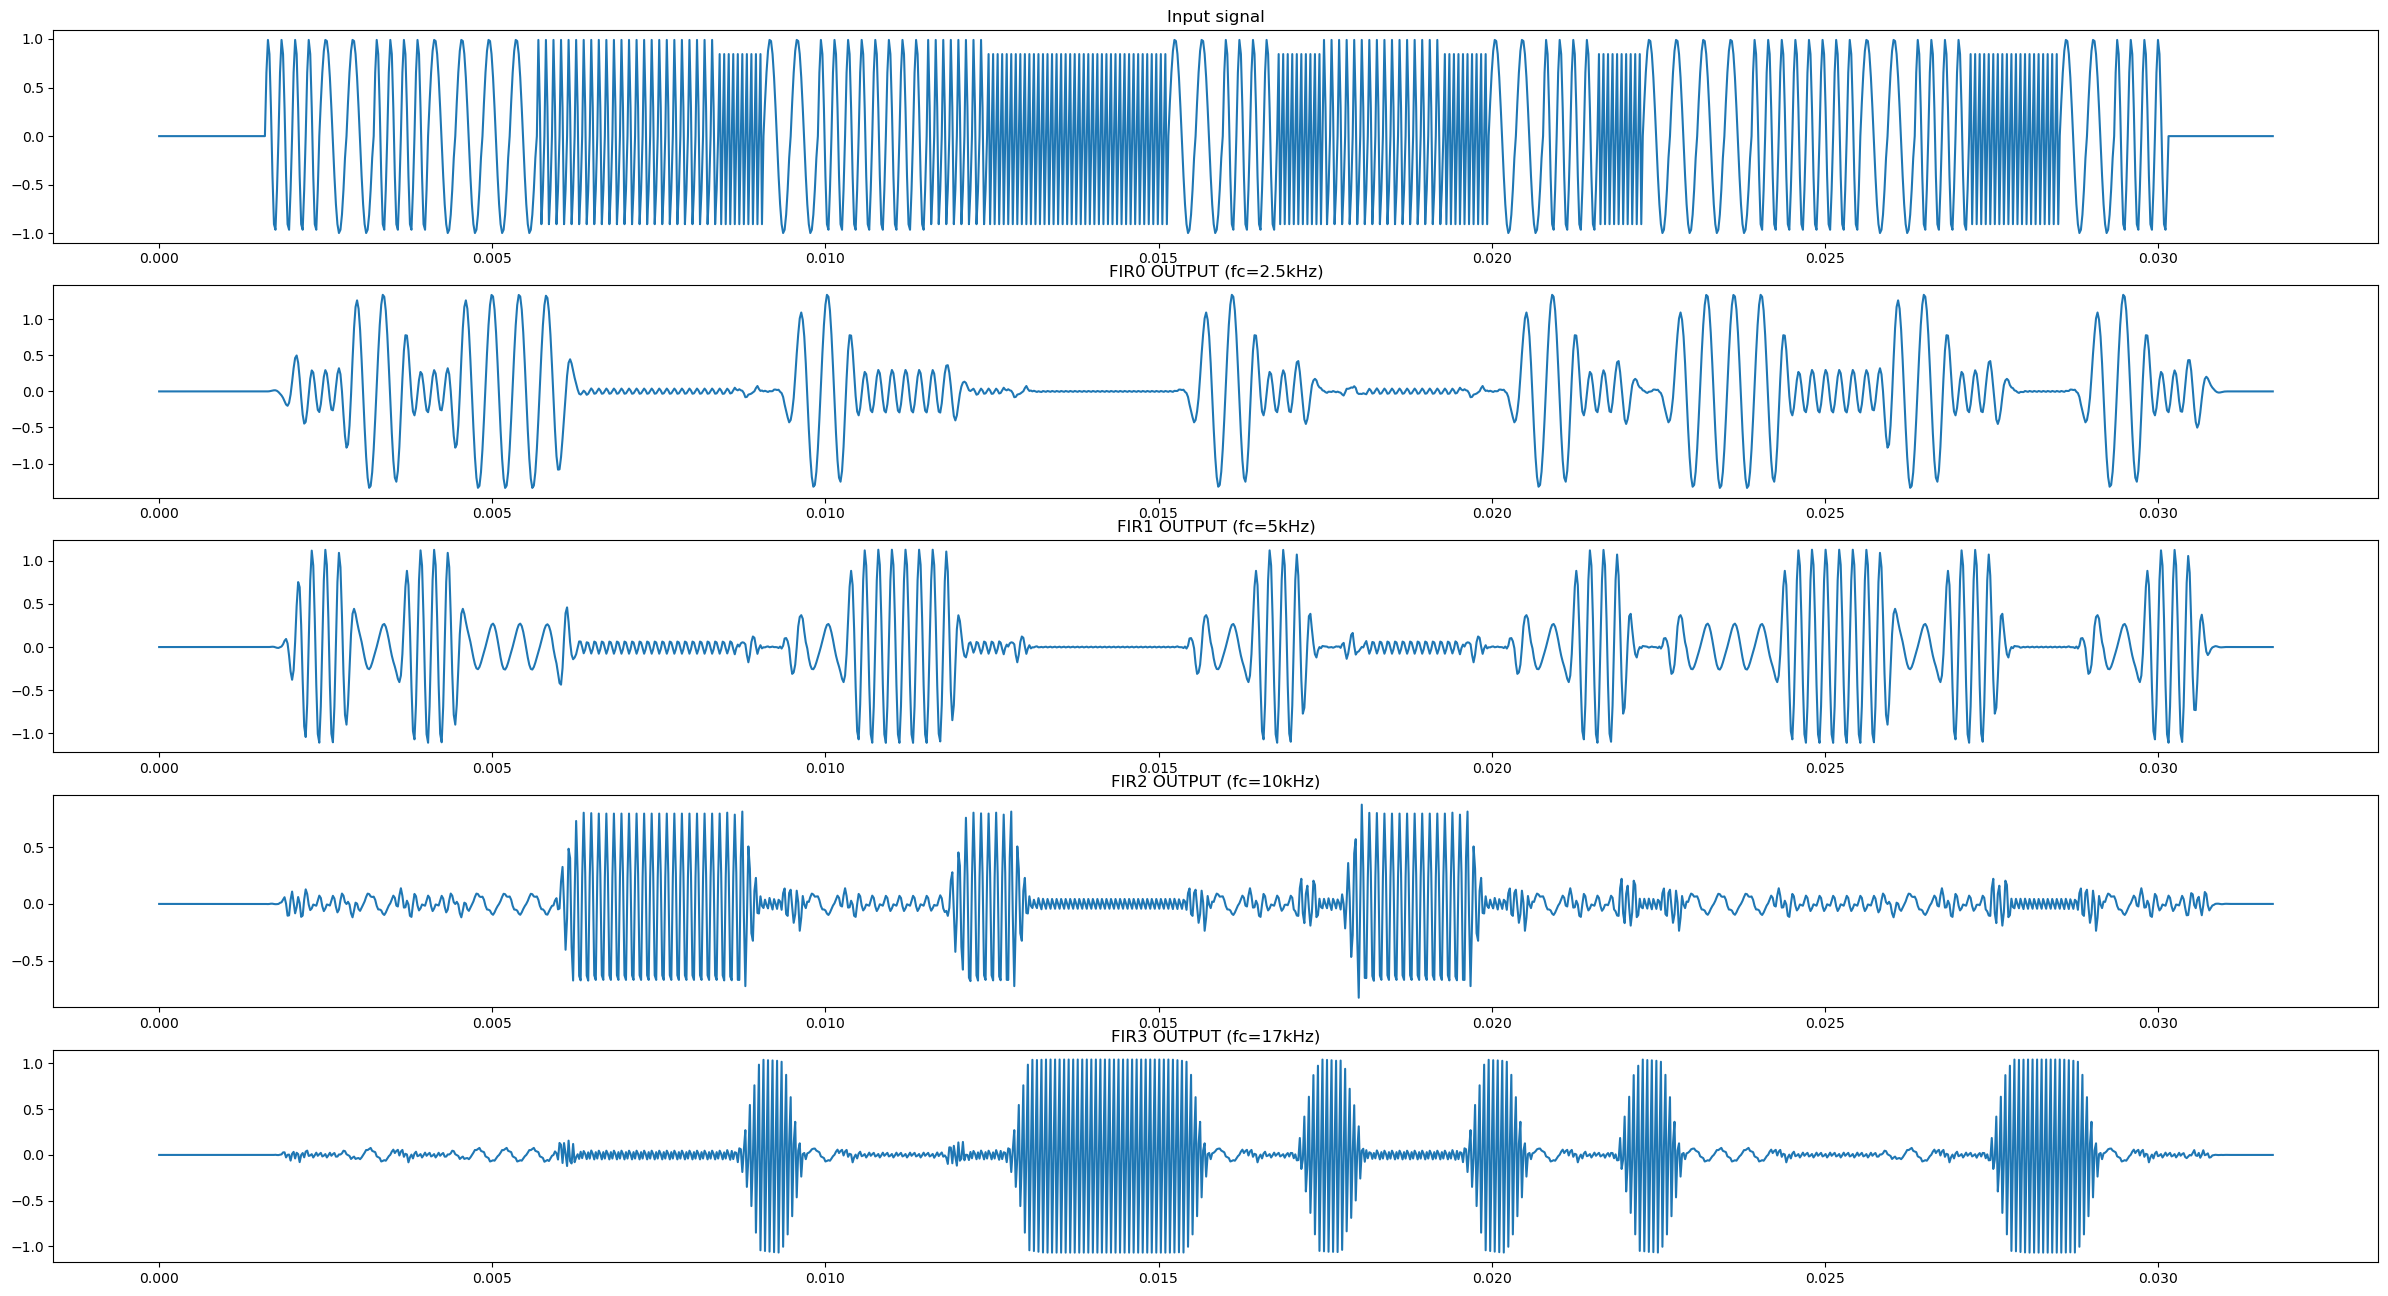

In [100]:
inputSignal = np.concatenate((np.zeros(70),
                              np.tile(signal1,4), # BIT STOP
                              np.tile(signal0,2), # BIT START
                              np.tile(signal1,4), # COMIENZO DATOS
                              np.tile(signal0,2),
                              np.tile(signal0,2),
                              np.tile(signal2,8),
                              np.tile(signal2,8),
                              np.tile(signal2,8),
                              np.tile(signal3,10),
                              np.tile(signal0,2),
                              np.tile(signal1,4),
                              np.tile(signal1,4),
                              np.tile(signal2,8),
                              np.tile(signal3,10),
                              np.tile(signal3,10),
                              np.tile(signal3,10),
                              np.tile(signal3,10),
                              np.tile(signal0,2),
                              np.tile(signal1,4),
                              np.tile(signal3,10),
                              np.tile(signal2,8),
                              np.tile(signal2,8),
                              np.tile(signal3,10),
                              np.tile(signal0,2),
                              np.tile(signal1,4),
                              np.tile(signal3,10),
                              np.tile(signal0,2),
                              np.tile(signal0,2),
                              np.tile(signal1,4),
                              np.tile(signal1,4),
                              np.tile(signal0,2),
                              np.tile(signal1,4),
                              np.tile(signal3,10),
                              np.tile(signal3,10),
                              np.tile(signal0,2),
                              np.tile(signal1,4), # BIT PARIDAD (PAR),
                              np.zeros(70)
                             ))
inputTime = np.arange(0, np.size(inputSignal)/fs, 1/fs)

# Reiniciamos los filtros
fir0.FIRFilterClear()
fir1.FIRFilterClear()
fir2.FIRFilterClear()
fir3.FIRFilterClear()

salida_fir0 = np.array([])
salida_fir1 = np.array([])
salida_fir2 = np.array([])
salida_fir3 = np.array([])


for sample in inputSignal:
    # Actualizamos el valor de los dos filtros
    fir0.FIRFilterUpdate(sample)
    fir1.FIRFilterUpdate(sample)
    fir2.FIRFilterUpdate(sample)
    fir3.FIRFilterUpdate(sample)
    
    salida_fir0 = np.append(salida_fir0,fir0.out)
    salida_fir1 = np.append(salida_fir1,fir1.out)
    salida_fir2 = np.append(salida_fir2,fir2.out)
    salida_fir3 = np.append(salida_fir3,fir3.out)

fig, axes = plt.subplots(5,1,figsize=(30,16))
axes[0].set_title("Input signal")
axes[0].plot(inputTime,inputSignal)
axes[1].set_title("FIR0 OUTPUT (fc=2.5kHz)")
axes[1].plot(inputTime,salida_fir0)
axes[2].set_title("FIR1 OUTPUT (fc=5kHz)")
axes[2].plot(inputTime,salida_fir1)
axes[3].set_title("FIR2 OUTPUT (fc=10kHz)")
axes[3].plot(inputTime,salida_fir2)
axes[4].set_title("FIR3 OUTPUT (fc=17kHz)")
axes[4].plot(inputTime,salida_fir3)
plt.show()